###### NB : After running all the cells, an $out$ directory will be created where you can find the following files :
<ol>
    <li>original_anhui.jpg : Original image.</li>
    <li>reconstructed_anhui.jpg : Reconstructed image.</li>
    <li>Gaussian Pyramid directory : contains the gp layers.</li>
    <li>Laplacian Pyramid directory : contains the lp layers.</li>

</ol>
    

# 1- Image compression Using Gaussian and Laplacian pyramids.

## 1.1 Gaussian and Laplacian pyramids

$g_i$ denotes the $i^{th}$ Gaussian layer, and $L_i$ the $i^{th}$ Laplacian layer. Such as, the base of the pyramid (original layer) is $i=1$

$ L_1 = g_1 - upscale(g_2) $

$ L_2 = g_2 - upscale(g_3) $

...

$ L_N = g_N$


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

try :
    os.mkdir("./out")
except:
    _

N = 12 # change it to change the number of layers ;-)
# loading image + convertion to RGB
anhui = cv2.cvtColor(cv2.imread("./imgs_vids/Anhui.jpg"), cv2.COLOR_BGR2RGB).astype('float32')
#assert anhui.shape[0]%2**N==0 and anhui.shape[1]%2**N==0, "the image sizes aren't divisible by 2 for at least N times, which causes problem in Laplacian pyramid"

# Downsampling (reducing the resolution) the image N times
anhuiGPD = [anhui] # will contain N layers of Gaussian pyramid   
for i in range(N):
    anhuiGPD.append(cv2.pyrDown(anhuiGPD[-1]))
    
# Upsampling (increasing the resolution) the image
anhuiU = cv2.pyrUp(anhuiGPD[-1]) # Not used

# Creating Laplacian pyramid by substracting the extended version of 
# the upper level gaussian pyramid and the upscaled current level in the Gaussian
# pyramid
anhuiLP = [anhuiGPD[-1]]
for i in range(1,N+1):
    #print(anhuiGPD[-i-1].shape,cv2.pyrUp(anhuiGPD[-i]).shape)
    #print(N+1-i-1,N+1-i)
    laplacian_layer = cv2.subtract(anhuiGPD[-i-1], cv2.pyrUp(anhuiGPD[-i], dstsize = (anhuiGPD[-i-1].shape[1],anhuiGPD[-i-1].shape[0]) )) # resizing not to fall in the assertion error refers to this line here 
    anhuiLP.append(laplacian_layer)
anhuiLP = anhuiLP[::-1] #  turning it upside down the have the base as index 0

In [3]:
def plottingPyramids(Pyramid,N,mini= 1, maxi = N+2,int_conv = True):
    fig = plt.figure(figsize=(7,7*N))
    for i in range(mini,maxi):
        idx =  -i
        ax = fig.add_subplot(maxi,1,i)
        if int_conv:
            temp = Pyramid[idx].astype(int)
        elif i == mini:
            temp = Pyramid[idx].astype(int)
        else:
            temp = Pyramid[idx]
        ax.imshow(temp, cmap = plt.cm.gray)
        ax.set_title("Layer : {}, Width : {}, Height : {}".format(maxi-i,Pyramid[idx].shape[1],Pyramid[idx].shape[0]))  
        ax.axis("off")
    plt.show()

In [4]:
try :
    os.mkdir("./out/Gaussian Pyramid")
    os.mkdir("./out/Laplacian Pyramid")
except:
    _
def imgsSave(dire,arr,mini,maxi):
    ctn = 0
    for i in range(mini,maxi):
        filename = dire + "%d.jpg"%ctn
        ctn+=1
        idx =  -i
        cv2.imwrite(filename, cv2.cvtColor(arr[idx],cv2.COLOR_RGB2BGR))      

In [5]:
imgsSave( "./out/Gaussian Pyramid/GP",anhuiGPD,mini= 1, maxi = N+2)
imgsSave( "./out/Laplacian Pyramid/LP",anhuiLP,mini= 1, maxi = N+2)

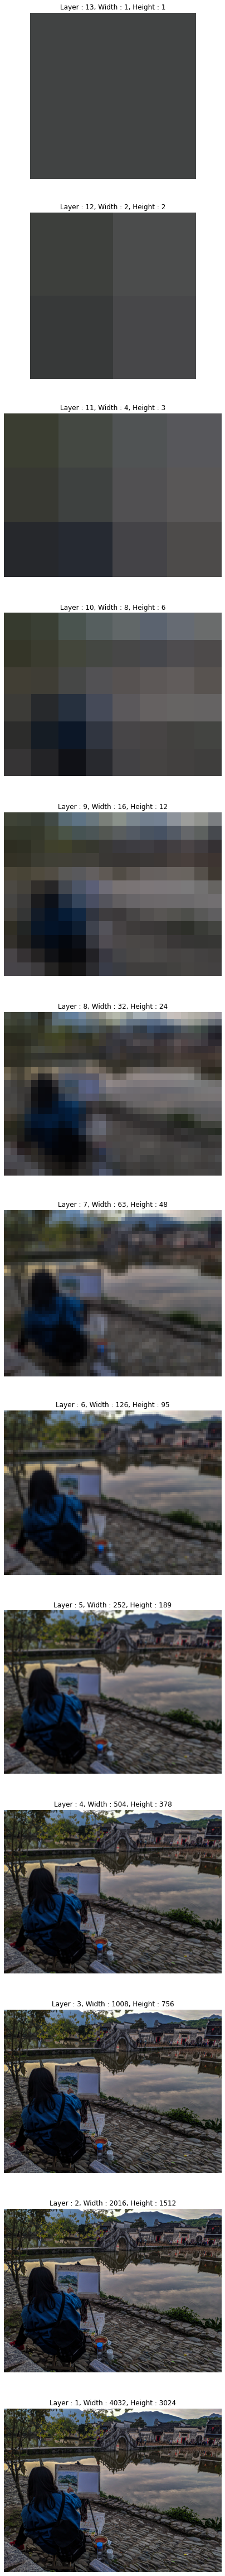

In [6]:
# plotting the Gaussian pyramid images
plottingPyramids(anhuiGPD,N+1,mini= 1, maxi = N+2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

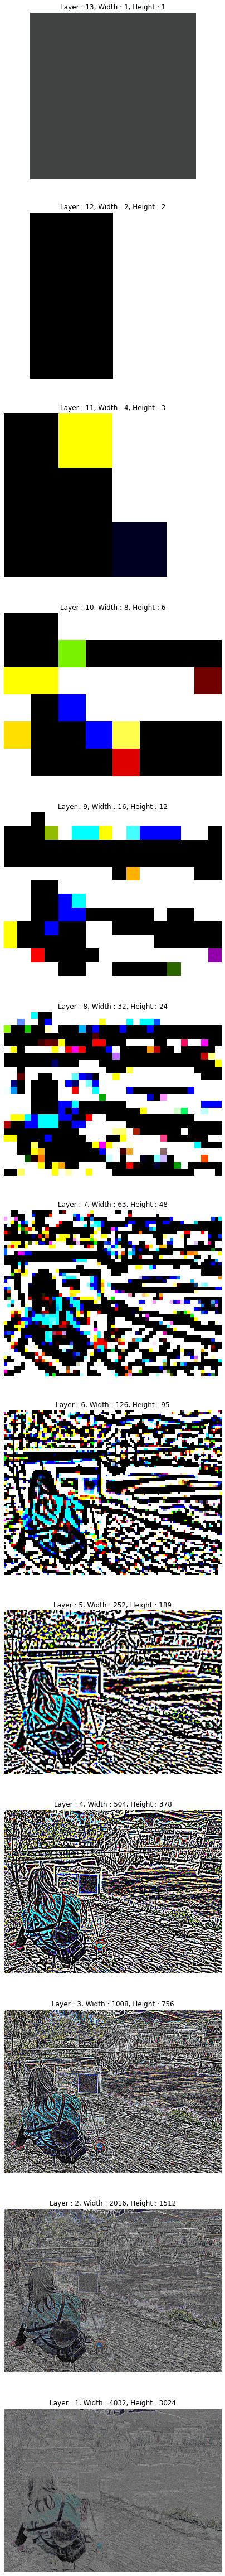

In [7]:
# plotting the Laplacian pyramid image
plottingPyramids(anhuiLP,N+1,mini= 1, maxi = N+2,int_conv=False)

## 1.2 Computing Gaussian pyramid  from Laplacian pyramid

$ g_N = L_N $

$ g_{N-1} = upscale(g_{N}) + L_{N-1}$

...

$ g_{1} = upscale(g_{2}) + L_{1}$

with $ g_{1} $ the reconstructed image

In [8]:
anhuiL2G = [anhuiLP[-1]]
for i in range(1, N+1):
    print( anhuiLP[-i-1].shape,cv2.pyrUp(anhuiL2G[-1]).shape )
    laplacian2Gaussian_layer = cv2.add(cv2.pyrUp(anhuiL2G[-1], dstsize = (anhuiLP[-i-1].shape[1],anhuiLP[-i-1].shape[0]) ), anhuiLP[-i-1] )        
    anhuiL2G.append(laplacian2Gaussian_layer)

anhuiL2G = anhuiL2G[::-1] # removing the head and turning it upside down the have the base as index 0

(2, 2, 3) (2, 2, 3)
(3, 4, 3) (4, 4, 3)
(6, 8, 3) (6, 8, 3)
(12, 16, 3) (12, 16, 3)
(24, 32, 3) (24, 32, 3)
(48, 63, 3) (48, 64, 3)
(95, 126, 3) (96, 126, 3)
(189, 252, 3) (190, 252, 3)
(378, 504, 3) (378, 504, 3)
(756, 1008, 3) (756, 1008, 3)
(1512, 2016, 3) (1512, 2016, 3)
(3024, 4032, 3) (3024, 4032, 3)


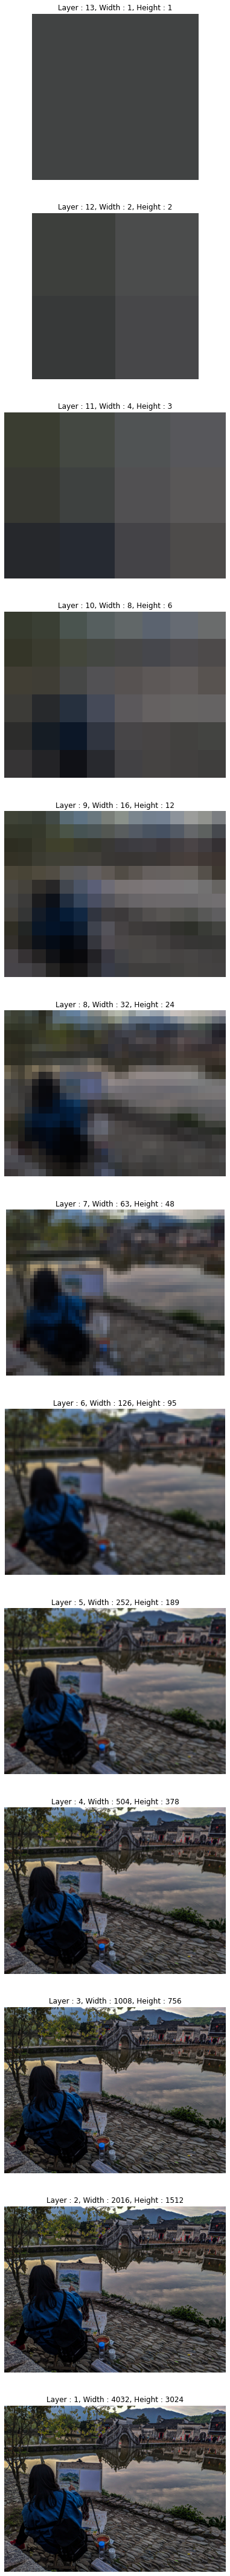

In [9]:
# plotting the Gaussian Layers converted from the Laplacian pyramid
# each layer is the reconstructed image of the same original gaussian layer 
    
plottingPyramids(anhuiL2G,N,mini= 1, maxi = N+2)

## 1.3 Putting the original and reconstructed image side to side

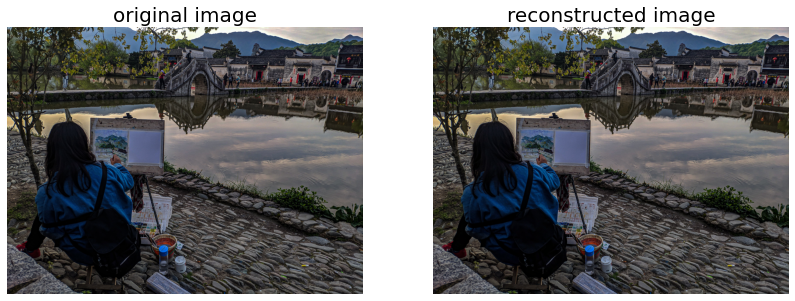

True

In [10]:
original_image = anhui
compressed_image = anhuiL2G[0]

fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.imshow(original_image.astype(int),cmap = plt.cm.gray)
ax2 = fig.add_subplot(122)
ax2.imshow(compressed_image.astype(int),cmap = plt.cm.gray)
ax1.set_title('original image',size = 20)
ax2.set_title('reconstructed image',size = 20)
ax1.axis("off")
ax2.axis("off")
plt.show()
cv2.imwrite("./out/original_anhui.jpg",cv2.cvtColor(original_image,cv2.COLOR_RGB2BGR))                   
cv2.imwrite("./out/reconstructed_anhui.jpg",cv2.cvtColor(compressed_image,cv2.COLOR_RGB2BGR))

# 2- Image Blending.

In [11]:
N = 10 # change it to change the number of layers ;-) (controls the blending)
# loading the images
eyes = cv2.cvtColor(cv2.imread("./imgs_vids/Eyes.jpg"), cv2.COLOR_BGR2RGB)      
ball = cv2.cvtColor(cv2.imread("./imgs_vids/Ball.jpg"), cv2.COLOR_BGR2RGB)     
# upscaling eyes once times because it's too small
eyes = cv2.pyrUp(eyes)

# adding contours to eyes to make the 3 images of equal size
countoured_eyes = np.zeros(ball.shape).astype('uint8')
countoured_eyes[ 400:400+eyes.shape[0],700:700+eyes.shape[1] ] = eyes       

# creating a mask
mask = np.zeros(ball.shape).astype('float32')
mask[ 400:400+eyes.shape[0],700:700+eyes.shape[1] ] = (1,1,1)       
 
# creating gaussian pyramid with depth N
def GP(img,N):
    imgGP = [img]
    for i in range(N):
        imgGP.append(np.float32(cv2.pyrDown(imgGP[-1])))
    return imgGP
# creating Laplacian pyramid from gaussian pyramid
def LP(imgGP):
    imgLP = [imgGP[-1]]
    for i in range(1,len(imgGP)):
        # to Not fall into that previous assertion error (1.1), we will be resizing 
        laplacian_layer = np.subtract(imgGP[-i-1], cv2.pyrUp(imgGP[-i], dstsize = (imgGP[-i-1].shape[1],imgGP[-i-1].shape[0])  )) # col then row in cv2                
        imgLP.append(laplacian_layer)
    return imgLP

# blending each level based on the mask of the gaussian level
def blending(img1LP,img2LP,maskP):
    BLP = []
    for l1,l2,mask in zip(img1LP,img2LP,maskP):
        BLP.append(l2 * mask + l1 * (1.0 - mask)) # in my case since I have black contours, I could have added them directly without multiplying it by the mask, but I kept the general formula.
    return BLP

# reconstructing the image from the blended laplacian pyramid    
def reconstruct(blended):
    b_arr = [blended[0]]
    for i in range(len(blended)-1):
        rec_layer = cv2.add(blended[i+1], cv2.pyrUp(b_arr[-1], dstsize=(blended[i + 1].shape[1], blended[i + 1].shape[0])))
        b_arr.append(rec_layer)
    return b_arr
    

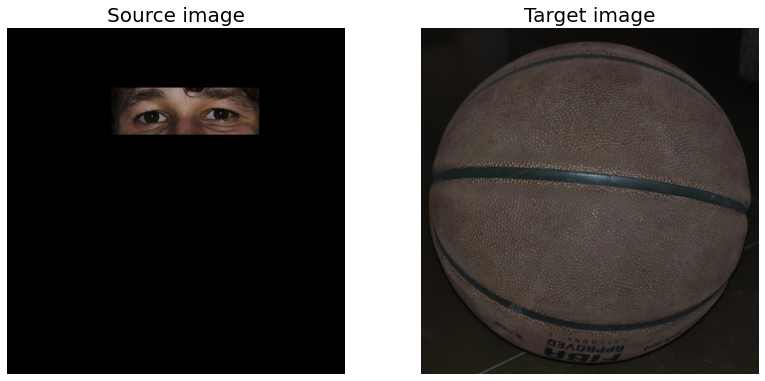

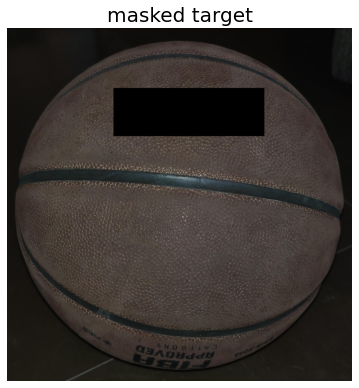

In [12]:
fig = plt.figure(figsize=(21,14))
ax = fig.add_subplot(231)
ax.imshow(countoured_eyes)
ax.axis('off')
ax.set_title("Source image", size = 20)
ax = fig.add_subplot(232)
ax.imshow(ball)
ax.set_title("Target image", size = 20)
ax.axis('off')
fig = plt.figure(figsize=(21,14))
ax = fig.add_subplot(133)
ax.imshow(ball * (1 - mask.astype(int)))
ax.axis('off')
ax.set_title("masked target", size = 20)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


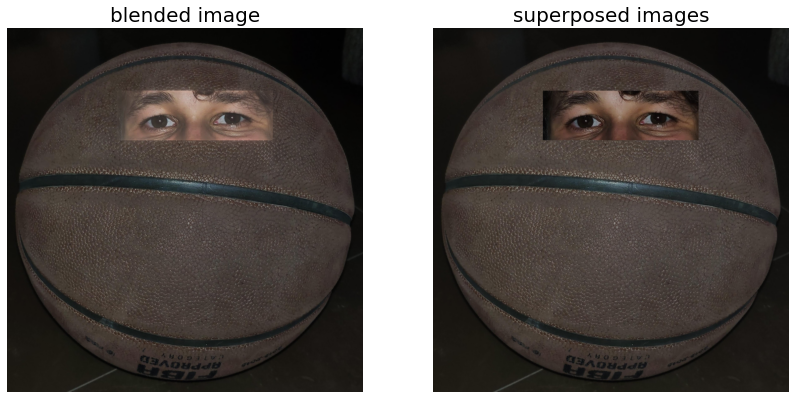

In [13]:
# gaussian pyramids of the images and the mask
gp1 = GP(countoured_eyes,N)
gp2 = GP(ball,N)
Mgp = GP(mask,N)

# laplacian pyramids of the images
lp1 = LP(gp1)
lp2 = LP(gp2)

# reversing the gaussian pyramid of the mask
Mgp = Mgp[::-1]

# blending the images
blended = blending(lp2,lp1,Mgp)

# plotting the reconstructed images + just addition of the images
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
ax.imshow(reconstruct(blended)[N].astype(int))
ax.axis('off')
ax.set_title("blended image", size = 20)
    
ax1 = fig.add_subplot(122)
ax1.imshow((ball* (1 -mask.astype(int)) + countoured_eyes ).astype(int))
ax1.axis('off')
ax1.set_title("superposed images", size = 20)

plt.show()

# 3- Optical Flow. Lucas-Kanade (check OF directory)